## Lab

1. Import the necessary libraries.
2. Load the `customer_value_analysis.csv` into the variable `customer_df`.

In [119]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [9]:
#import data
data = pd.read_csv('files_for_lab/customer_value_analysis.csv')

(9134, 24)

(9134, 24)

#### 3. First look at its main features (`head`, `shape`, `info`).

In [16]:
display(data.shape)

(9134, 24)

In [17]:
display(data.head(5))

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

None

### Column renaming and editing

In [5]:
import cleaning_functions_2

In [12]:
#4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).

data_2 = cleaning_functions_2.make_col_names_lowercase(data)
data_2 = cleaning_functions_2.remove_blanks_in_col_names(data_2) 
data = data_2.copy()

In [19]:
data.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [162]:
5# Change the type of `effective_to_date` column to DateTime format.

data_3 = data.copy()
data_3['effective_to_date'] = pd.to_datetime(data_3['effective_to_date'],format='%m/%d/%y')
data = data_3.copy()

In [48]:
#6. Check `NaN` values per column.
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [54]:
# recast as object: month, monthly_premium_auto, months_since_last_claim, months_since_policy_inception
data = data.astype({'months_since_last_claim': 'object', 'months_since_policy_inception': 'object'})

### Function

In [61]:
#7. Define a function that given an input dataframe, returns two dataframes: 
# one with numerical columns and another with categorical columns of the input dataframe. 

def split_dataframe_num_cat(df: pd.DataFrame) -> pd.DataFrame:
    '''
    this function identifies numerical and categorical columns and generates a new dataframe for each type.
    input: df
    output: df
    '''
    df2 = df.copy()
    numerical = data.select_dtypes(include=[np.number])
    categorical = data.select_dtypes(include=['object'])
    return numerical, categorical



In [62]:
numerical_df, categorical_df = split_dataframe_num_cat(data)

In [70]:
print(data.columns)
print(numerical_df.columns)
print(categorical_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')
Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'months_since_last_claim', 'months_since_policy_inception',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
   

In [ ]:
# 8. Drop any ID column: dropped customer column
categorical_df.drop(columns='customer', inplace=True)

### Instructions

9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

#### Answer: monthly premium auto and negative correlation, income. The monthly premium auto could make sense as the higher the premium the higher the claim amount could be. With regards to the negative relationship with income, more research is needed.

In [73]:
numerical_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,-0.013122,-0.011233,0.632017
number_of_open_complaints,-0.036343,0.006408,-0.013122,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,-0.014241,-0.002354,1.000000


### Function

In [103]:
# 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 

def split_num_dataframe_continuous_discrete(df: pd.DataFrame, unique_threshold: int=36) -> pd.DataFrame:
    '''
    this function separates numerical variables categorizing them into continuous or discrete
    and generates a new dataframe for each type.
    input: df
    output: df
    '''
    df2 = df.copy()
    
    col_list = df2.columns
    continuous_col_list =[]
    discrete_col_list =[]   
    
    for col in col_list:
        if df[col].nunique() > unique_threshold:
            continuous_col_list.append(col)
        else: discrete_col_list.append(col)

    continuous_df = df2[continuous_col_list]
    discrete_df = df2[discrete_col_list]
    
    return continuous, discrete


In [104]:
continuous, discrete = split_num_dataframe_continuous_discrete(numerical_df)

In [105]:
print(continuous.columns)
print(discrete.columns)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'total_claim_amount'],
      dtype='object')
Index(['number_of_open_complaints', 'number_of_policies'], dtype='object')


### Plotting

In [151]:
# 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, 
# and set the figuresize = (16,16). 

def create_barplots(df: pd.DataFrame):
    fig, ax = plt.subplots(nrows=df.shape[1], ncols=1, figsize=(16,16))
   
    for i, col in enumerate(df.columns):
        sns.barplot(y = col, data = df, ax=ax[i])
        ax[i].set_title(f'Bar plot of {col}')
    plt.show()

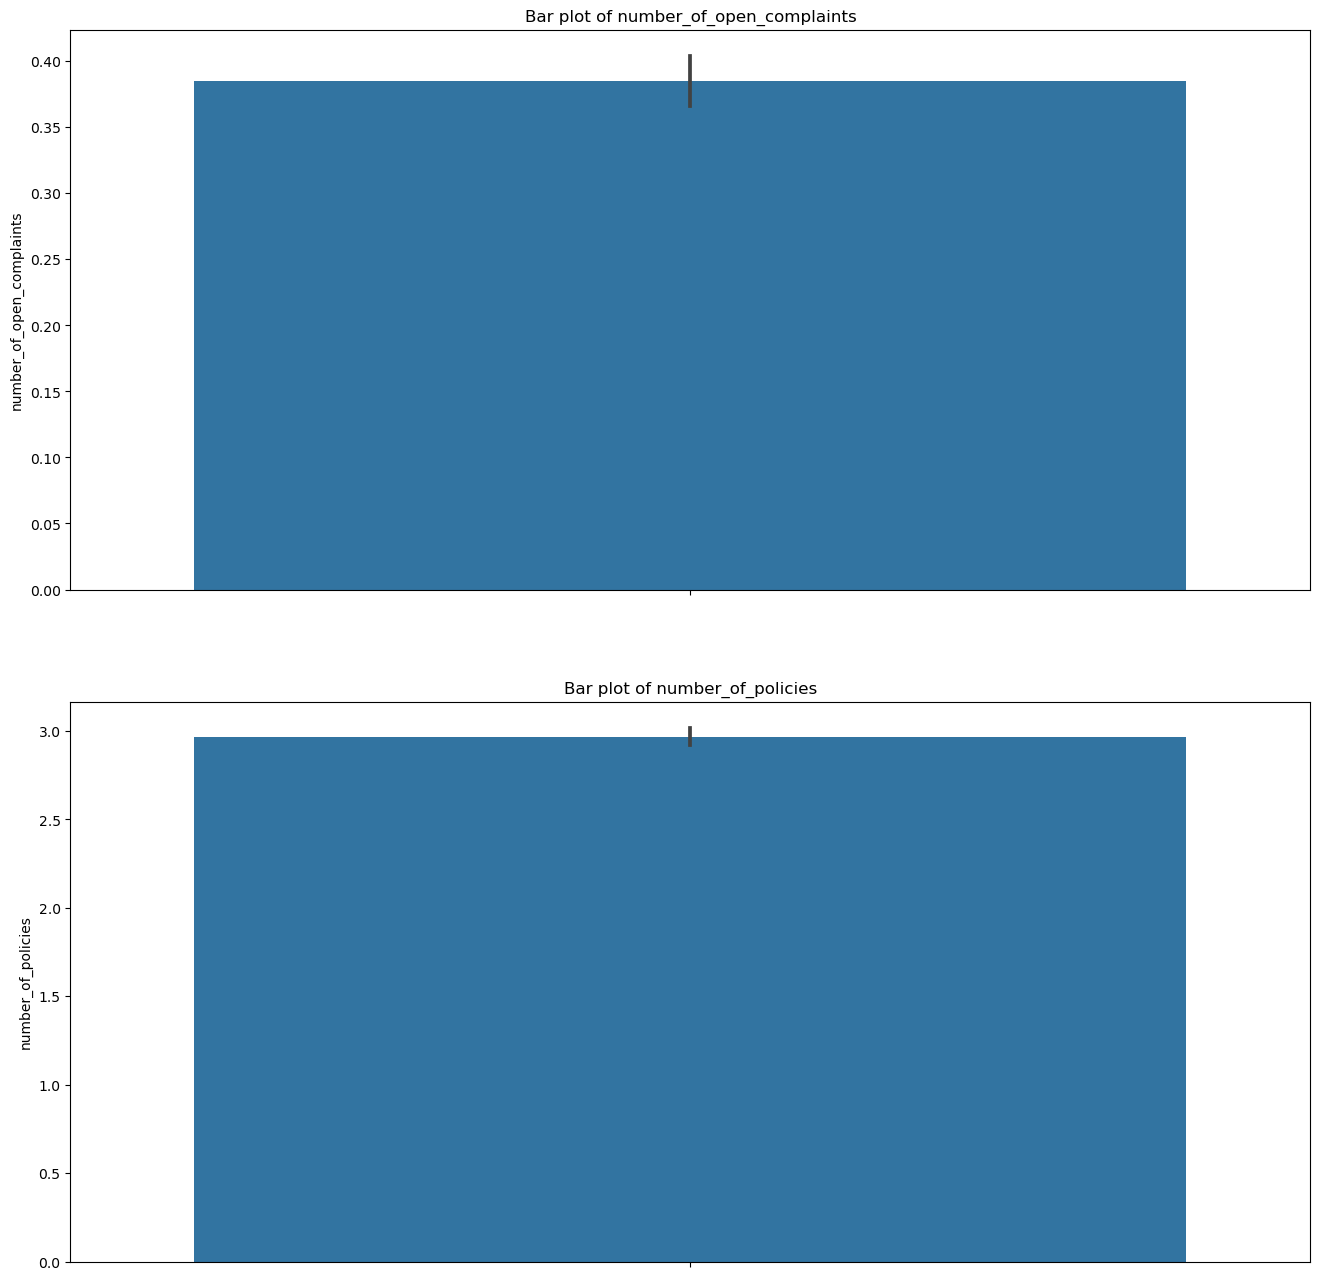

In [154]:
create_barplots(discrete)

In [163]:
# 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, 
# and set the figuresize = (16,16)

def create_histplots(df: pd.DataFrame):
    fig, ax = plt.subplots(nrows=df.shape[1], ncols=1, figsize=(16,16))
   
    for i, col in enumerate(df.columns):
        sns.histplot(x = col, data = df, ax=ax[i])
        ax[i].set_title(f'Histogram plot of {col}')
    plt.show()

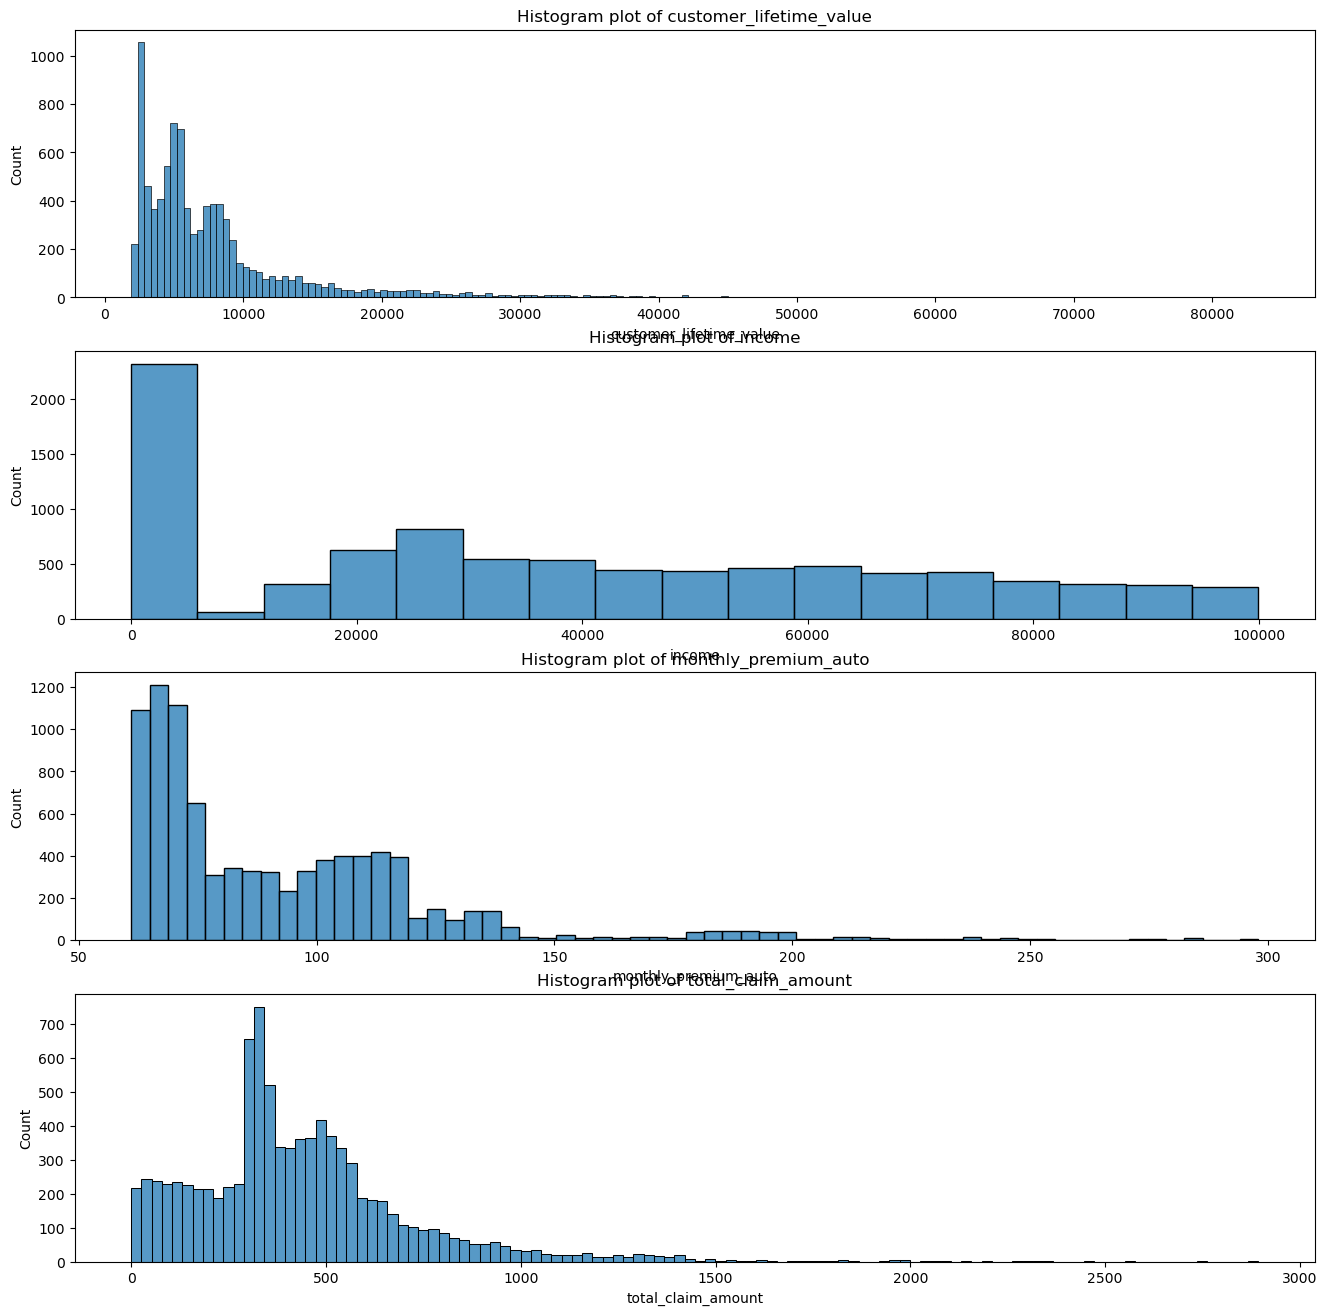

In [158]:
create_histplots(continuous)

## Section  / Comments

13. According to the previous histogram plots, do you think that you will have to apply any transformation?

Looking at the data it seems that some tranformation would make sense as the variables all have long tails to the right. I would suggest to assess outliers and remove if needed, and to apply a logarithmic (as values are all positive) or powertransformation to improve the skewness of the distributions.

In [159]:
# 14. Look for outliers in the continuous variables that you have found. 
# Hint: There was a good plot to do that. 
# Define a function to create this kind of plot for the continuous_df.

def create_pairplot(df: pd.DataFrame):
    
    sns.pairplot(data=df)
    

/Users/alexferrer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


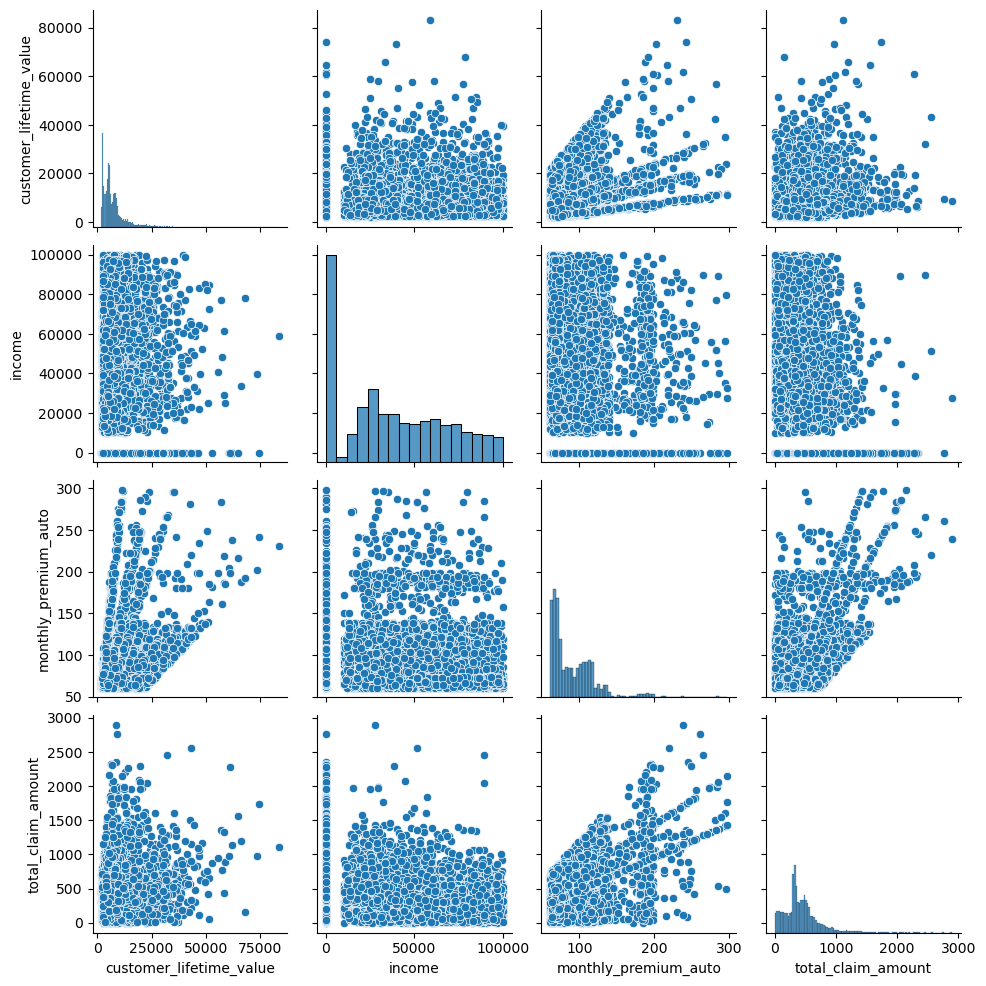

In [160]:
create_pairplot(continuous)